# Homework 1: Data wrangling with python

This assignemnet focus on text as data, with groupby, apply, and text vectorization focus.

We will work with this dataset: http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html

In [2]:
#get the dataset for the current directory of this notebook
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv


--2023-04-11 11:18:45--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28,10M  96,4MB/s    in 0,3s    

2023-04-11 11:18:46 (96,4 MB/s) - ‘train.csv’ saved [29470338/29470338]



In [3]:
#visualize the data
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
# See how the apply is transforming the dataset
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [5]:
#Print first rows
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Question 1 (15 points)

implement a new column text which contains the lowercased title and lead

In [6]:
# TODO implement a new column text which contains the lowercased title and lead


In [7]:
#SOLUTION
df["text"] = df['title'].str.lower()+';'+df['lead'].str.lower()
df.head()

,label,title,lead,text
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bears claw back into the black (reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace (reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks' outlook (reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","oil prices soar to all-time record, posing new..."


Question 2 (15 points)

print the number of documents for each label

In [8]:
# TODO print the number of documents for each label


In [9]:
#SOLUTION
df2=df.groupby(['label']).count()
df2=df2.reset_index()
df2=df2[['label','title']]
df2.columns=['label','count']
df2.head()

,label,count
0,business,30000
1,sci/tech,30000
2,sport,30000
3,world,30000


Question 3 (15 points)

Create a new column with the number of words for each text

In [10]:
# TODO create a new column with the number of words for each text






In [11]:
#SOLUTION
df['words_text']= df.text.apply(lambda x: len(str(x).split(' ')))

Question 4 (15 points)

plot the average number of words per label 

In [12]:
# TODO plot the average number of words per label 
# tip: https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


<AxesSubplot: xlabel='label'>

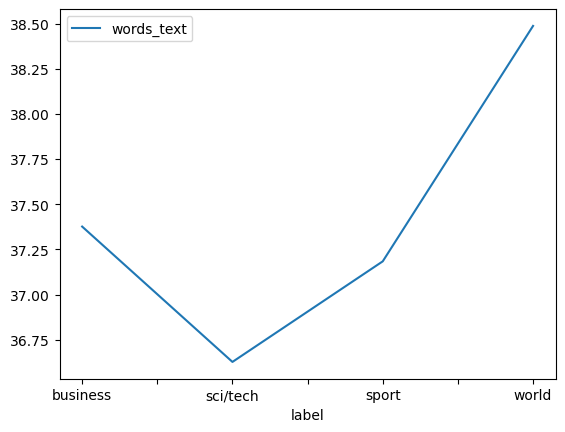

In [13]:
#SOLUTION
df3=df.groupby(['label'])['words_text'].mean()
df3=pd.DataFrame(df3)
df3.plot()

Question 5 (15 points)

implement a function which counts how often a pattern appears in a text

In [14]:
import re
keywords = ["switzerland", "usa", "europe", "israel"]
for keyword in keywords:
    print(keyword)
    
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = x.count(keyword)
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print (df["text"].apply(count_keyword_frequencies).sum())
    print('\n')

switzerland
151


usa
2602


europe
4848


israel
3573




Question 6 (15 points)

Create a vectorization of the dataset using the SKlearn CountVectorizer with the full vocabulary

How long is the vocabulary for the whole dataset?

tip: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [15]:
#TODO: Create a vectorization of the dataset using the SKlearn CountVectorizer with the full vocabulary





In [16]:
#TODO: How long is the vocabulary for the whole dataset?



In [26]:
#SOLUTION
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
vectorizer = CountVectorizer()
whole_df=vectorizer.fit_transform(df['text'], df['label']) #can be with or without the label column

whole_df.get_shape()

(120000, 65006)

In [38]:
print(whole_df[0:1]) #if you would train with this, the model would see this instead of (sample, features) format we aim
# this is a spase encoding of entries where the values are not zero. It tells us that for row 0, column 62536 the value is 2 (class 2)

  (0, 62536)	2
  (0, 54842)	1
  (0, 7396)	1
  (0, 12600)	1
  (0, 6510)	1
  (0, 30178)	1
  (0, 57946)	1
  (0, 8345)	1
  (0, 48864)	2
  (0, 52479)	1
  (0, 51606)	1
  (0, 55636)	1
  (0, 18921)	1
  (0, 6832)	1
  (0, 40992)	1
  (0, 60125)	1
  (0, 15556)	1
  (0, 5306)	1
  (0, 51513)	1
  (0, 25524)	1
  (0, 3522)	1


Question 7 (15 Points)

Separate the vectorized dataset into training and testing dataset with a test size of 30%

In [18]:
#TODO: Separate the vectorized dataset into training and testing dataset with a test size of 30%





In [19]:
#SOLUTION

#This will break the kernel, we ned to reduce the vocabulary
import numpy as np
from sklearn.model_selection import train_test_split

#this will break due to lack of space in RAM for the operation .toarray() needed
#the .toarray() will transform the encoding into the actual (samples, features) structure we need for a ML/DL model
#X_train, X_test, y_train, y_test = train_test_split(whole_df.toarray(), df['label'], test_size=0.30, random_state=42)


#this is how is doesnt break:

#we choose max 1000 unique words for the vocabulary, 1000 columns/features
vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7)
whole_df=vectorizer.fit_transform(df['text'], df['label'])

print(whole_df.get_shape())

#with 1000 features, the operation .toarray() can be done without occupying too much space
X_train, X_test, y_train, y_test = train_test_split(whole_df.toarray(), df['label'], test_size=0.30, random_state=42)




(120000, 1000)


Deliver in HTML

In [20]:
#HOW TO DELIVER: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab
#download this notebook after all your answers and upload it to the files tab on the left
#right click on it to check the path 
#replace the path ('/content/Untitled0.ipynb') by your file path
#%%shell
#jupyter nbconvert --to html /content/Untitled0.ipynb

#refresh the folder (not the page)
#download the html